#### Import Python Libraries

In [2]:
import numpy as np 
import wntr 


#### Import and Simulate EPANET Water Distribituion Networks (WDN)

In [3]:
inp_file = 'G:/My Drive/Work Data/PT. Hutomo Bangun Perkasa/Hydroinformatics/Urban Modelling/WNTR/Net1.inp'
wn       = wntr.network.WaterNetworkModel(inp_file)
sim      = wntr.sim.EpanetSimulator(wn)
results  = sim.run_sim() 

#### Plot the Water Distribution Networks (WDN)

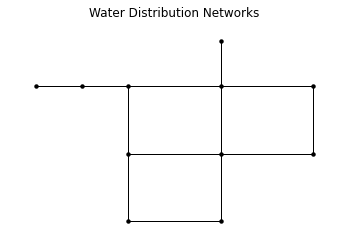

<AxesSubplot:title={'center':'Water Distribution Networks'}>

In [4]:
wntr.graphics.plot_network(wn, title = 'Water Distribution Networks') 

#### Check the Pressure Along the Networks

In [5]:
P_All_Nodes = results.node['pressure']
P_All_Nodes.head()

name,10,11,12,13,21,22,23,31,32,9,2
0,89.717087,83.890205,82.317276,83.476387,82.767410,83.539085,84.931053,81.500954,77.934105,0.0,36.575996
3600,90.454926,84.729393,83.251549,84.406586,83.667519,84.464272,85.857826,82.406822,78.848099,0.0,37.511158
7200,90.917648,85.255745,84.155159,85.054062,83.953423,84.992241,86.371002,82.307472,78.707024,0.0,38.424873
10800,91.417061,85.823898,84.786301,85.681648,84.562263,85.614861,86.994759,82.919395,79.322929,0.0,39.056461
14400,91.644539,86.082703,85.396606,85.978691,84.503044,85.736961,87.100243,82.392494,78.709198,0.0,39.673317


#### Removing Reservoir Nodes from the Networks

In [6]:
P_Nodes = P_All_Nodes.drop('9', axis=1)
P_Nodes.head()

name,10,11,12,13,21,22,23,31,32,2
0,89.717087,83.890205,82.317276,83.476387,82.767410,83.539085,84.931053,81.500954,77.934105,36.575996
3600,90.454926,84.729393,83.251549,84.406586,83.667519,84.464272,85.857826,82.406822,78.848099,37.511158
7200,90.917648,85.255745,84.155159,85.054062,83.953423,84.992241,86.371002,82.307472,78.707024,38.424873
10800,91.417061,85.823898,84.786301,85.681648,84.562263,85.614861,86.994759,82.919395,79.322929,39.056461
14400,91.644539,86.082703,85.396606,85.978691,84.503044,85.736961,87.100243,82.392494,78.709198,39.673317


In [7]:
P_Col_Min = P_Nodes.min() # Set a variable to check the minimum pressure in coloums persepective
P_Row_Min = P_Nodes.min() # Set a variable to check the minimum pressure in rows perspective

for i in P_Col_Min :      # Check the minimum pressure in coloums persepective
    for i in P_Row_Min :  # Check the minimum pressure in rows perspective
        if i > 20 : 
            print ('All pressures in nodes are above 20 feet')
        else : 
            print ('Some pressures are below 20 feet. Loop Ended. Check your diameter')
            break

All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in nodes are above 20 feet
All pressures in

#### Make a Loop to Itteratively Change Pipe Diameter with Certain Bondaries

In [58]:
new_diameter = []

for i in np.arange(0, 0.4, 0.001) : 
    pipe_10.diameter = pipe_10.diameter = 0.44 - i 
    results  = sim.run_sim() 
    P_All_Nodes = results.node['pressure']
    P_Nodes = P_All_Nodes.drop('9', axis=1)
    P_Col_Min = P_Nodes.min() # Set a variable to check the minimum pressure in coloums persepective
    P_Row_Min = P_Nodes.min() # Set a variable to check the minimum pressure in rows perspective
   
    for j in P_Col_Min :      # Check the minimum pressure in coloums persepective
        for j in P_Row_Min :  # Check the minimum pressure in rows perspective
            if j > 20 : 
                new_diameter.append(pipe_10.diameter) # Putting a new diameter in an array
                continue
            else : 
                break
                print ('Some pressures are below 20 feet. Loop Ended. Check your diameter')
                break

IndentationError: unexpected indent (3648294364.py, line 12)

In [57]:
min(new_diameter) # Get the minimum value of an array, which represent the minimum diameter 

0.04099999999999998